(array([], dtype=int64),)


c:\Users\Tim-K\miniconda3\envs\expra\lib\site-packages\psignifit-0.1-py3.9.egg\psignifit\likelihood.py:191: RuntimeWarning: divide by zero encountered in log
  pbin = pbin  + (ni-ki)*np.log(1-psi)
c:\Users\Tim-K\miniconda3\envs\expra\lib\site-packages\numpy\core\fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


Results.Fit:  [6.07296748e+00 1.06071079e+00 2.47360973e-06 9.88161567e-02
 2.27904915e-08]
Results.conf_Intervals:  [[[5.76464466e+00 5.82675545e+00 5.93284444e+00]
  [6.21422539e+00 6.17966023e+00 6.12084730e+00]]

 [[5.14788961e-01 6.06188027e-01 8.31138376e-01]
  [2.20665332e+00 2.00341305e+00 1.65010550e+00]]

 [[7.81076178e-04 1.56215236e-03 4.99888754e-03]
  [1.00529489e-01 8.22670928e-02 5.20142760e-02]]

 [[8.34403525e-03 1.53590249e-02 3.82507329e-02]
  [2.23395264e-01 2.00700408e-01 1.55565835e-01]]

 [[3.95602871e-03 7.91205743e-03 2.73883314e-02]
  [3.64636661e-01 3.19100820e-01 2.32033111e-01]]]


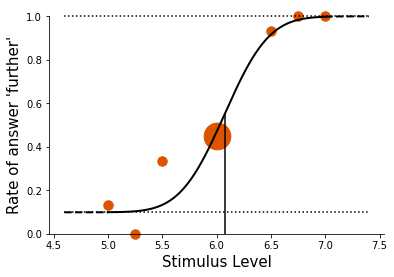

<AxesSubplot:xlabel='Stimulus Level', ylabel="Rate of answer 'further'">

In [24]:
# imports
import numpy as np
import pandas as pd
import psignifit as ps 
import matplotlib.pyplot as plt
import glob

participant_id = "Tim_001" # Name of folder for participant

path = "C:/Dropbox/Experiment Data/exp2-tim-psychophysics/" + participant_id + "/S001/trial_results.csv" # Path to data for participant

data_df = pd.read_csv(path) # Read experiment files for participant

target_distances = data_df["stimulusDistance"].unique() # All different stimulus distances 

reference_distance = data_df["referenceDistance"][0] # Reference distance (either 6 or 3)


row1 = data_df.loc[data_df["targetDist1"] == 6.5]

correct_answer = 0

current_row = row1.iloc[3]

if current_row.get(["targetDist1"][0]) > current_row.get(["targetDist2"][0]):
    correct_answer = 1

#print(correct_answer)

participant_answer = 0

if current_row.get(["answer"][0]) == "right":
    participant_answer = 1

#print(participant_answer)

#print(row1.iloc[0])
#print(current_row.get(["answer"][0]))


# data sollte in Form np.array([ [stimulus_level, nCorrect, nTotal] ])


# TODO: Wie häufig sagt die Versuchsperson, dass ein Wert weiter weg / näher dran ist als die reference value? 
# Answer == position


def getDataAsArray():
    data = []

    for target in target_distances:
        # All rows with target
        #table = data_df.loc[data_df["targetDist1"] == target].append(data_df.loc[data_df["targetDist2"] == target])
        table1 = data_df.loc[data_df["targetDist1"] == target]
        table2 = data_df.loc[data_df["targetDist2"] == target]

        nAnswerCloser = 0
        nTotal = 0

        for i in range(len(table1)):
            row = table1.iloc[i]

            if row.get(["answer"][0]) == "right":
                nAnswerCloser += 1

            nTotal += 1

        # Loop through rows with target
        for i in range(len(table2)):

            # Look at one row
            row = table2.iloc[i]

            if row.get(["answer"][0]) == "left":
                nAnswerCloser += 1
            
            nTotal += 1
        
        data.append([target, nAnswerCloser, nTotal]) # Absolute target values

    return np.array(data)
data = getDataAsArray()



options = dict()
options['sigmoidName'] = 'norm'
options['expType'] = 'YesNo'


results = ps.psignifit(data, options) # Get results

print(f"Results.Fit: ", results['Fit'])
print(f"Results.conf_Intervals: ", results['conf_Intervals'])

red = [220./255, 83./255, 0]
ps.psigniplot.plotPsych(results, yLabel="Rate of answer 'further'", dataColor=red) # Plot results